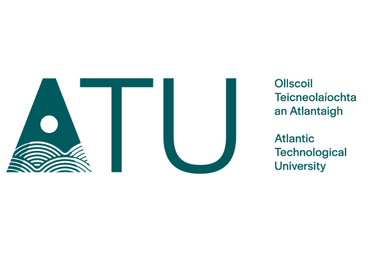

***
# Exploring Classification Algorithms with the Iris Dataset
***
### Machine Learning & Statistics Module, Computing in Data Analytics
### Eleanor Sammon G00411277
***

### TABLE OF CONTENTS

### Introduction

### Supervised Learning
- What is supervised learning
- labelled data
- relevance/implementation/importance of supervised learning in machine learning

## Understanding the Iris Dataset


### Overview of the Iris Dataset

Often referred to as the Fisher Iris Dataset and despite what the name suggests, it was in fact [Edgar Shannon Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson) (1897 - 1969) who, in the 1930s, collected the raw data which formed the basis of the famous iris data set.  Having secured a fellowship to study at the John Innes Horticultural Institute in Britain, Anderson met the statistician [Sir Ronald Aylmer Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) who went on to published a paper in 1936 proposing a methodological framework to delineate 'desirable' traits based on the Iris dataset and using the statistics originally gathered by Anderson.

There are between 200 and 300 species within the [iris](https://sites.berry.edu/cborer/inventory/iris/) genus so identifying them to this particular family can be challenging.  Most irises do have some shared characteristics however, first among them is the presence of six 'petals'. The inner three petals are referred to as “standards” while the outer three sepals, often mistaken for petals, are called “falls”. Sepals serve as protection for the flower in bud and as support for the petals when in bloom.

### Attributes of the Iris Data set

The [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set) represents four measurements of floral morphology on 150 plants - 50 individuals for each of three genus (*Iris versicolor*, *Iris setosa*, and *Iris virginica*).  The numeric parameters which the dataset contains are sepal width, sepal length, petal width and petal length.  Classification accuracy is the ratio of number of correct predictions to the total number of input samples, it works best if there are equal number of samples belonging to each class which, in this case, there are.

Each row in the Iris dataset describes one flower for which there are four seperate measurements - the length and width of the sepals and the length and width of the petals.  The 5th column is the species of iris: *setosa, versicolor*, or *virginica*. 

The Fisher data set is described as the 'Hello World' for machine learning, useful for practicing basic machine learning algorithms.  It endures because the data is open source, the accuracy and origin are both known, it is 'real' data and with three types of flower, it allows for more than just binary classification.  Additionally, with an even 50 in each classification it is balanced and has no null or missing values.  All measurements are on the same scale (cm) so no normalisation is called for and the file size isn’t unwieldy or excessively complicated.  

## My Investigation of the Data Set Using Python
My first step was to import the libaries that I felt would be most useful in manipulating the data and import the data set from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) as iris.csv.

In [59]:
# importing libraries which I expect to use
from enum import auto
import time 
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [60]:
data = pd.read_csv('iris.csv')
print (data)

     SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0         5.1000      3.5000       1.4000      0.2000     Iris-setosa
1         4.9000      3.0000       1.4000      0.2000     Iris-setosa
2         4.7000      3.2000       1.3000      0.2000     Iris-setosa
3         4.6000      3.1000       1.5000      0.2000     Iris-setosa
4         5.0000      3.6000       1.4000      0.2000     Iris-setosa
..           ...         ...          ...         ...             ...
145       6.7000      3.0000       5.2000      2.3000  Iris-virginica
146       6.3000      2.5000       5.0000      1.9000  Iris-virginica
147       6.5000      3.0000       5.2000      2.0000  Iris-virginica
148       6.2000      3.4000       5.4000      2.3000  Iris-virginica
149       5.9000      3.0000       5.1000      1.8000  Iris-virginica

[150 rows x 5 columns]


This data set being quite small, very famous and scrutinised to death I already know that the data is ship-shape for analysis and doesn't require any tidy-up but it seems also to be good practice when dealing with data to check for null values as a program encountering a null value may return an error and/or skew the analysis.  Missing values are usually represented in the form of Nan, null or None.

To establish null values I used the code `data.isna().sum()` which gives the sum of missing values. In this case, helpfully, none.  For argument's sake, had I encountered null values in this particular data set I likely would have used the median value to replace them. 


In [61]:
print(data.isna().sum())

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Class          0
dtype: int64


In [62]:
# Descriptive or summary statistics can be elicited using Pandas dataframe `describe()` 
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0540,3.7587,1.1987
std,0.8281,0.4336,1.7644,0.7632
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


In [63]:
## To get specific measurements for each species I can drill down using the groupby function and 
## narrow it down to show only the max and minimum values for each of the classes

print ("These are the minimum measurements for each class:\n")
print(data.groupby("Class").min())

print ("\n\nThese are the maximum measurements for each class:\n")
print(data.groupby("Class").max())

print ("\n\nThese are the mean measurements for each class:\n")
print(data.groupby("Class").mean())


These are the minimum measurements for each class:

                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa           4.3000      2.3000       1.0000      0.1000
Iris-versicolor       4.9000      2.0000       3.0000      1.0000
Iris-virginica        4.9000      2.2000       4.5000      1.4000


These are the maximum measurements for each class:

                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa           5.8000      4.4000       1.9000      0.6000
Iris-versicolor       7.0000      3.4000       5.1000      1.8000
Iris-virginica        7.9000      3.8000       6.9000      2.5000


These are the mean measurements for each class:

                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa           5.0060      3.4180       1.46

This useful function in `pandas` allows me to group the classes of species and then narrow it down to show only the minimum and maximum measurements for each.  I found these stats useful in that it gives the range of measurements and the mean values sketch the average dimensions for each species and already it is clear that *Iris setosa* is smaller, and by virtue of that, more distinctive than the other two species. 

## Basic Data Visualisation

### Histogram
A [histogram](https://asq.org/quality-resources/histogram) is a commonly used plotting tool to show frequency distributions in numerical data.  It visualises the distribution of values in a given dataset, the x-axis displaying the values in the dataset and the y-axis displaying the frequency of each value.  It differs from a bar chart in that it deals with quantitative data rather than categorical and elements are grouped together as ranges rather than individual entities, as they would be in a bar chart. In a histogram the data is allocated to bins, a series of intervals into which the data is effectively sorted.  Helpfully, the `pandas` in-built function `.hist()` plots histograms for the features in the dataset. In trying to establish the correct number of bins to specify I found a number of methods such as the Freedman–Diaconis rule, Sturges' rule and the Shimazaki-Shinomoto method to name but a few, and then I happened across the fact that there is an [`auto`](https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram) function, which uses the maximum of the Sturges and Freedman-Diaconis bin choice, so I quite happily deployed that instead!  

Text(0.5, 0.98, 'Histograms of the the Iris Data Set')

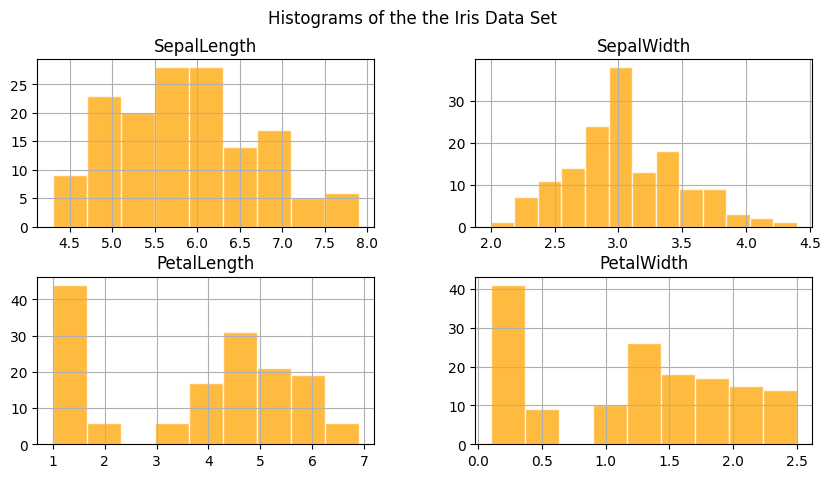

In [64]:
#dataframe.hist() from Pandas will generate a histogram of each column of variables
data.hist (alpha = 0.75, color = ['orange'], edgecolor='w', bins = 'auto', figsize=(10,5))
plt.suptitle("Histograms of the the Iris Data Set")

The histograms for petal length and petal width are remarkable similar and the standalone bars to the left represent Irish Setosa, well apart from the other two species making these quite distinctive classification features. The overlap between the species in terms of sepal length and sepal width is significant such that it's not as easy to distinguish the species in these two histograms. 

### Scatter plots
Scatter plots use a collection of points placed using Cartesian coordinates, basically a system used to locate a point, or points, in two-dimensional space from two variables.  By displaying a variable in each of the X and Y axis, we can clearly see if a relationship or correlation between the two variables exists. The useful thing about scatter plots is that they retain the exact data values and sample size. By colour coding the three species of iris in the plots, this distinction is even clearer. 

Text(0.5, 0.98, 'Scatterplots of Iris Data Set Variables\n\n')

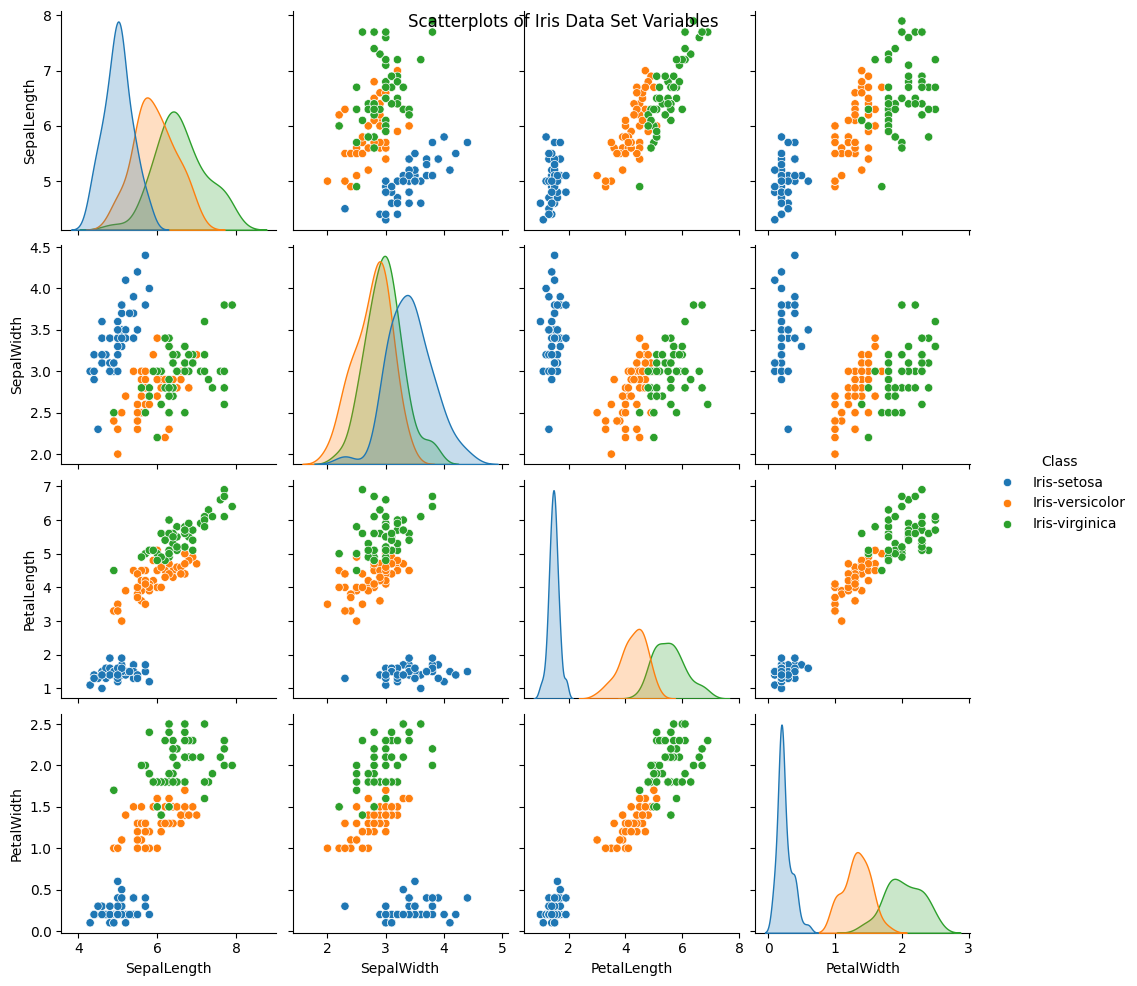

In [65]:
sns.pairplot (data, hue = "Class")
plt.suptitle ("Scatterplots of Iris Data Set Variables\n\n")

#### Violin Plot

I find violin plots visually better than boxplots while fulfilling a similar purpose. As I understand it, a violin plot is something of a cross between a box plot and a histogram in that it shows the spread or distribution of the data. The density is 'mirrored' giving the plot its distinctive violin shape. The dot in the middle of each 'violin' is the median value of that particular range.

Text(0.5, 0.98, 'Violinplot of Iris Data Set Species: Sepal Length\n\n')

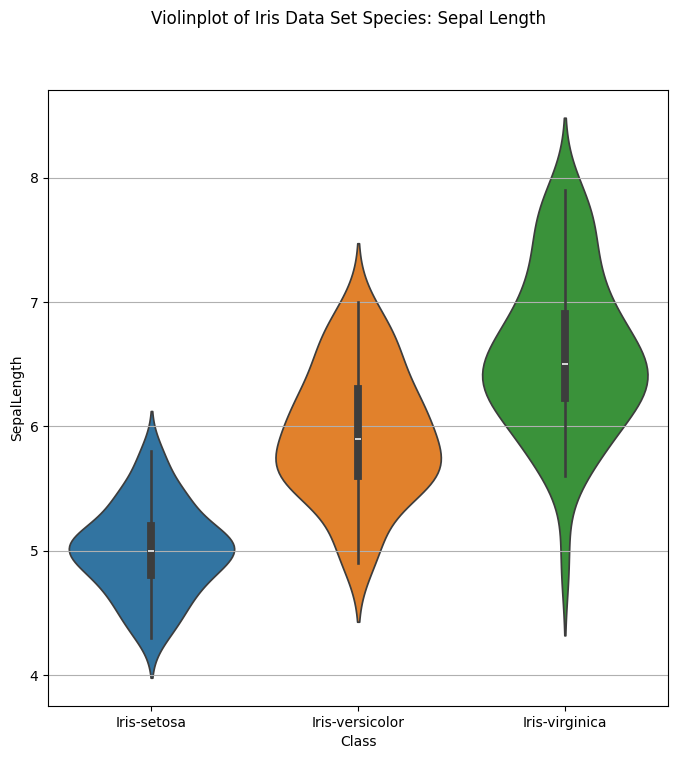

In [66]:
plt.figure(figsize=(8,8))
sns.violinplot(x=data["Class"], y=data["SepalLength"], data=data, hue = "Class")
plt.grid (axis = "y") # I referred to w3schools for how to put in lines on Y axis only
plt.suptitle ("Violinplot of Iris Data Set Species: Sepal Length\n\n")

For the purposes of this exercise I plotted petal length and it's clear from the plot that (once again!) Iris setosa differs considerably from the other two species whose violins are similar but nonetheless Iris verginica demonstrates a greater range in values than Iris versicolor.

#### Heatmap

A heatmap is a really powerful visualisation tool that uses colour to indicate correlation and, in my opinion, one of the most intuitive to understand. Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. +1 means variables are correlated, -1 they are inversely correlated and values closer to zero means there is no linear trend between the two variables.

I used Seaborn to plot the heatmap and in order to determine the correlation I used the .corr() method from pandas. The closer to 1, the more positively correlated they variables are, and because this presents like a visual of the concept "hotter-colder" I chose reds for this heatmap. Also I wanted to show the value of the cells, so I passed the parameter annot as True.

Text(0.5, 0.98, 'Heatmap of Iris Data Set Variables')

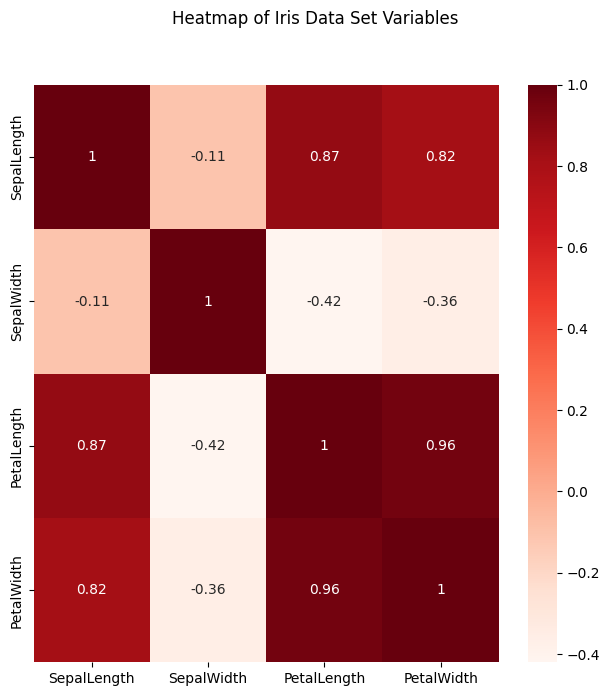

In [67]:
plt.figure(figsize=(7.5,7.5))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), cmap='Reds', annot=True)
plt.suptitle ("Heatmap of Iris Data Set Variables")

The heatmap shows that petal length and petal width, with a value close to 1, have a high correlation. Both petal width and petal length together show good correlation with sepal length. Sepal width has far less relationship with petal width and petal length.  High correlation between variables (also known as multicollinearity) can pose a challenge for some ML models - especially linear models - making it difficult for the model to separate the individual effects of each of the variables but doesn't necessarily mean that the model won't work at all. Multicollinearity can be addressed by either dropping one of the correlated variables or using a technique such as regularisation.

### Classification Algorithms

#### What is Classification?
Classification is the process of recognising, understanding, and grouping ideas and objects into preset categories. Using pre-categorised training datasets, machine learning programs apply algorithms to classify future datasets into such categories. In machine learning, algorithms use the training data to predict the likelihood that subsequent data will fall into one of the predetermined categories [(Dutta, 2022)](https://www.analyticssteps.com/blogs/types-classifiers-machine-learning).

### Common Classification Algorithms
Below I have chosen five of the most commonly applied ML algorithms, given a brief overview of how they work and listed the advantages and disadvantages of each.

#### Logistic Regression
Logistic regression aims to solve classification problems by predicting categorical outcomes, usually where there are two outcomes (binomial) [(W3schools)](https://www.w3schools.com/python/python_ml_logistic_regression.asp).  

[Rout, A. (2022)](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/) lists the main advantages of logistic regression including that it is easy to implement, interpret, and efficient to train; it doesn't make assumptions about distributions of classes and it can extend to multinomial regression and a natural probabilistic view of class predictions. Logistic regression provides a measure of how appropriate a predictor is and also its direction of association (positive or negative). It demonstrates good accuracy for many simple data sets and performs well where a dataset is linearly separable. It can interpret model coefficients as indicators of feature importance and is less inclined to overfitting.  

Clearly perhaps, as the author further expands, the main disadvantage of logistic regression lies in it's binary nature and the assumption of linearity between the dependent variable and the independent variables.  It can only be used to predict discrete functions and cannot solve non-linear problems requiring average or no multicollinearity between independent variables.  It can be difficult to identify and explain complex relationships using logistic regression, more powerful and compact algorithms, such as Neural Networks, are more efficient in such scenarios.

#### Decision Tree

A decision tree is a type of non parametric model that can be used in machine learning for both classification and regression.  It is used to categorise and/or make predictions based on how a previous set of questions were answered. Its name derives from its similarity in structure to a tree. The starting point is called the root node from which flows a series of decision nodes representing a question or split point and presenting decisions to be made. From the decision nodes are leaf nodes that represent the consequences or possible answers arising from those decisions [(Masters in Data Science, no date)](https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/). 

In the opinion of [Thorn, J (2020)](https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6), the advantages of decision tree lies in their simplicity and ease of interpretation.  They require less data than other algorithms to train and are tolerant to missing values.   Additionally, as mentioned, they can be used for both classification and regression. 

The author further outlines the drawbacks of decision tree being that they are prone to over-fitting and can be sensitive to outliers, perhaps more significant is that they are 'weak' learners.  A single decision tree alone will not make for a very strong prediction model so multiple trees are often combined to make ‘forests’ giving rise to a stronger ensemble model such as random forest. 

#### Random Forest

Random forest, as the name would suggest, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest contributes a class prediction and majority of predictions represents the overall model prediction.  While a decision tree offers a single path and considers all the features at once, a random forest creates multiple trees with random features [(Great Learning, 2022)](https://www.mygreatlearning.com/blog/random-forest-algorithm/).

In a helpful article on Medium, [Singh, J. (2020)](https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04) outlines the advantages of random forest including that it can be used for both classification and regression and works well with both categorical and numerical data. Because it chooses random features, this classifier generates uncorrelated decision trees which is useful in a dataset with a high number of features and because it bins the variables, it is not as influenced by outliers as decision tree. 

The author goes on to list the main disadvantages including that random forest operates like a 'black box' algorithm where the inner workings are not transparent which can make it more difficult to interpret.  Random Forests can also be computationally intensive for large datasets and a large number of trees can render the algorithm slow and ineffective for real-time predictions. While fast to train they can prove slow to create predictions once trained. 

#### K Nearest Neighbour

[Vatsal (2021)](https://towardsdatascience.com/k-nearest-neighbours-explained-7c49853633b6) describes K Nearest Neighbour as a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It classifies a data point based on how its neighbours are classified.  It is a non-parametric, 'lazy-learner' classification algorithm meaning that it makes no assumptions about the distribution of the data and, rather than learn a discriminative function, it memorises the training data. 

In terms of the advantages and disadvantages of K Nearest Neighbor, Vatsal indicates that this memory based approach makes KNN very adaptable to new training data and the algorithm is both easy to understand and implement.  Also the distance metric can be modified by the user to best suit application.  However, the choice of K is crucial for the model, if chosen incorrectly it can cause the model to be over / under fit. A K value too small will cause noise in the data and too large will make it computationally expensive.  As training data increases, the speed at which calculations are made rapidly decrease and it can perform poorly where data is imbalanced. 

#### Support Vector Machines

Support Vector Machines was initially developed for binary classification but can be efficiently extended for multiclass problems.  While it has widespread application in handwritten digit recognition, speaker identification and text categorisation, it is also one of the most popular approaches in breast cancer diagnosis and prognosis.  

[Ray, S. (2022)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/) highlighting that a key feature of a support vector machine classifier is to find an optimised decision boundary that represents the largest separation (maximum margin) between the classes.  Support vector machine starts from solving linear separable problems and then extends to deal with nonlinear problems. 

The pros and cons of SVM as outlined by Ray, S. (2022) are that it works well with a clear margin of separation and is effective in high dimensional spaces and is memory efficient because it uses a subset of training points in the decision function (the 'support vectors').  the author goes on to outline the disadvantages of SVM - it doesn’t perform well with a large data set because training time required is greater, it also doesn’t perform very well when target classes are overlapping (meaning more noise) and because finally SVM doesn’t directly provide probability estimates, these are calculated using five-fold cross-validation.

## 8. Training and Evaluating Models<a name="build_eval"></a>

I have implemented some pre-processing steps to ensure that my dataset is appropriately prepared in advance of running the models. Data Preprocessing transforms, or encodes, the data such that the features of the data can be easily interpreted by the algorithm and the machine can parse it. [(Patel, 2021)](https://jay190301.medium.com/data-science-data-pre-processing-using-scikit-learn-iris-dataset-1ba0a9ae04e6). In the Iris data set `Class` is a categorical variable and manyany machine learning modelook for aire numerical laels for the target variablHere I have used LabelEncoder (scikit-learn) to convert class into numerical format.  I already know that there are no null values so I didn't have to correct for this but I did use standard scaler
to standardisee: Standardize the scale of nume for consistency.  

The dataset is then split into training set and a test set, where X has all columns except the dependant column, being 'Class', and y holds this dependent feature. My test size is 0.2 and I have set random state so that the function will produce the same results across different executions. e transformed data.

In [68]:
# Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-Hot Encoding for Features
X_encoded = pd.get_dummies(X)

# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [69]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)


This demonstrates that the dataset has been split into a training set with 120 instances and a test set with 30 instances. Each instance having 4 features (sepal length, sepal width, petal length, petal width).

I can now fit my dataset to various models and see how they perform by measuring the time it takes to train each model and accuracy on the test set.

In [70]:
# Initialize the models 
models = [ 
    ('Logistic Regression', LogisticRegression(max_iter=1000)), 
    ('K-Nearest Neighbors', KNeighborsClassifier()), 
    ('Support Vector Machines', SVC()), 
    ('Decision Trees', DecisionTreeClassifier()), 
    ('Random Forests', RandomForestClassifier()) 
] 
 
# Initialize lists to store the performance data 
model_names = [] 
train_times = [] 
train_accuracies = []  # New list to store training accuracies
test_accuracies = [] 

# For each model 
for name, model in models: 
    # Measure the time it takes to train the model 
    start_time = time.time() 
    model.fit(X_train, y_train) 
    end_time = time.time() 
    train_times.append(end_time - start_time) 
     
    # Compute the model's accuracy on the training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
     
    # Compute the model's accuracy on the test set 
    y_test_pred = model.predict(X_test) 
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
         
    # Store the model name 
    model_names.append(name) 

# Create a DataFrame with the performance data 
performance_data = pd.DataFrame({ 
    'Model': model_names, 
    'Train Time (s)': train_times, 
    'Train Accuracy': train_accuracies,  # Add training accuracy to the DataFrame
    'Test Accuracy': test_accuracies 
}) 
 
print(performance_data)

                     Model  Train Time (s)  Train Accuracy  Test Accuracy
0      Logistic Regression          0.0248          0.9667         1.0000
1      K-Nearest Neighbors          0.0178          0.9583         1.0000
2  Support Vector Machines          0.0058          0.9750         1.0000
3           Decision Trees          0.0060          1.0000         1.0000
4           Random Forests          0.1102          1.0000         1.0000


The Test Accuracy is the accuracy of the model on the test set, and the Train Time is the time it took to train the model on the training set. As can be seen from the table above, all models achieved a test accuracy of 1.0, which means they perfectly classified the flowers in the test set. Initially I was concerned by this, thinking it couldn't possibly be correct so I back-tracked and refined the pre-processing steps as described in section (*).  However, still returning a perfect test accuracy, I did some further research and found that this is not entirely surprising given that the Iris dataset is small with few features and demonstrates high linear correlations with class making it notoriously easy to classify with modern machine learning algorithms [(Stack Overflow, 2016)](https://stackoverflow.com/questions/36967126/why-do-i-get-good-accuracy-with-iris-dataset-with-a-single-hidden-node).

I chose to output both training accuracy and test accuracy times to give further insight into the performance of the five models. A big difference between training and test accuracy may indicate overfitting. If a model performs well on training data but poorly on the test set, it could indicate that it has simply 'memorised' the training data instead of learning the underlying patterns. Showing both training and test accuracy obviously lends to better insights between the performance of the models against each other. 

In terms of training time, Random Forests took the longest time to train, while K-Nearest Neighbors was the fastest. However, we again see that owing to the small size of the dataset, the differences in training times are negligible.

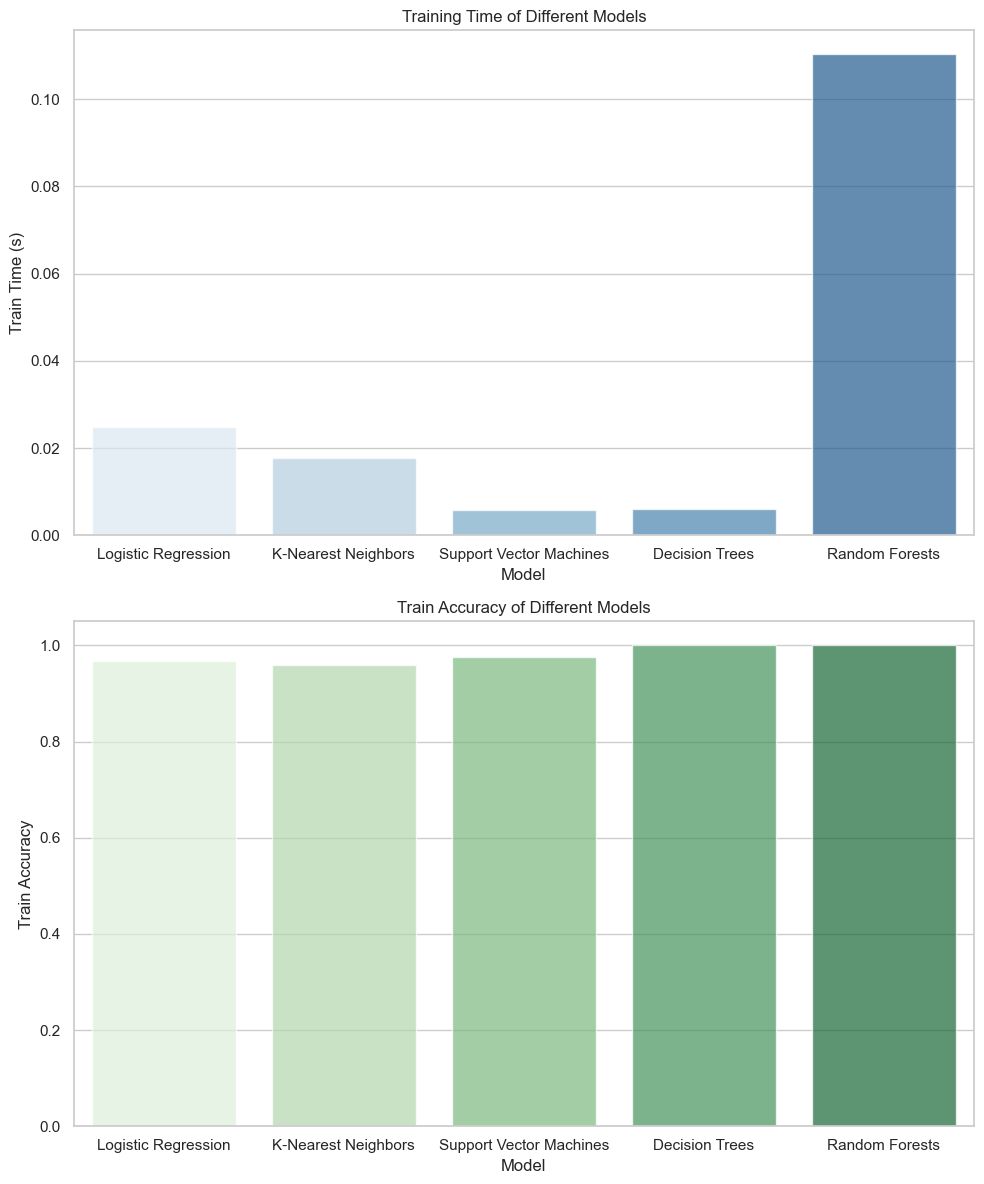

In [75]:
# Plot with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot training times with 3D-like effect
sns.barplot(x='Model', y='Train Time (s)', hue='Model', data=performance_data, ax=axes[0], palette="Blues", alpha=0.7, legend=False)
axes[0].set_title('Training Time of Different Models')

# Plot training accuracies with 3D-like effect
sns.barplot(x='Model', y='Train Accuracy', hue='Model', data=performance_data, ax=axes[1], palette="Greens", alpha=0.7, legend=False)
axes[1].set_title('Train Accuracy of Different Models')

# Adjust layout
plt.tight_layout()
plt.show()

                     Model  Cross-Validation Accuracy
0      Logistic Regression                     0.9733
1      K-Nearest Neighbors                     0.9733
2  Support Vector Machines                     0.9667
3           Decision Trees                     0.9533
4           Random Forests                     0.9600


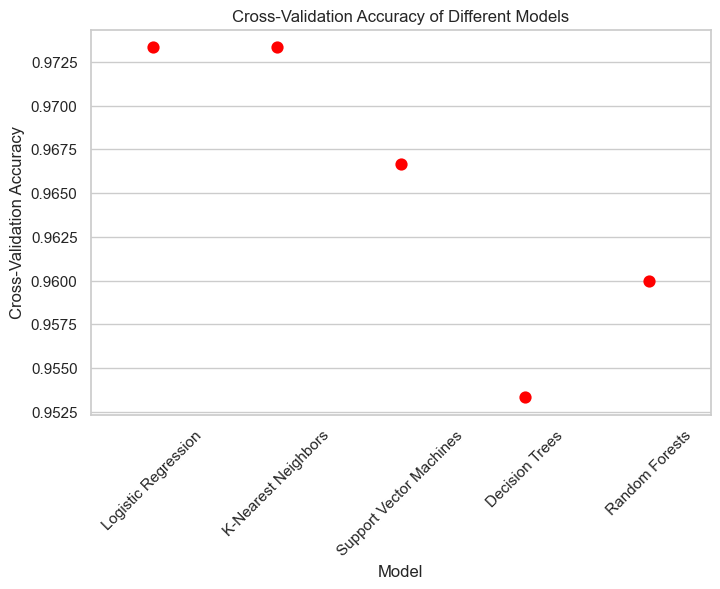

In [101]:
# Initialize k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the performance data
model_names = []
cross_val_accuracies = []

# For each model
for name, model in models:
    # Perform k-fold cross-validation
    cross_val_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    
    # Store the model name
    model_names.append(name)
    
    # Store the cross-validation accuracy
    cross_val_accuracies.append(np.mean(cross_val_results))

# Create a DataFrame with the performance data
cross_val_data = pd.DataFrame({
    'Model': model_names,
    'Cross-Validation Accuracy': cross_val_accuracies
})

#sorted by order
cross_val_data_sorted = cross_val_data.sort_values(by='Cross-Validation Accuracy')

# Display cross-validation results
print(cross_val_data)

# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot cross-validation accuracies using a point plot
plt.figure(figsize=(8, 5))
sns.pointplot(x='Model', y='Cross-Validation Accuracy', data=cross_val_data, color='red', linestyle='none', capsize=0.2)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()

### Time for some fun(!) user interaction

In [102]:
print ("\nLet's test the model!\n\nThese are the mean measurements for each class which may be helpful in entering your inputs:\n\n")
print(data.groupby("Class").mean())

# Calculate average measurements for each class
class_avg_min = data.groupby('Class').min().mean()
class_avg_max = data.groupby('Class').max().mean()

# Reequst user input within guideline parameters based on the min and max lengths (shown at (*) above)
sepal_length = float(input(
    f"\nPlease enter Sepal Length (cm) between {class_avg_min['SepalLength']:.2f} and {class_avg_max['SepalLength']:.2f}: "))
sepal_width = float(input(
    f"Please enter Sepal Width (cm) between {class_avg_min['SepalWidth']:.2f} and {class_avg_max['SepalWidth']:.2f}: "))
petal_length = float(input(
    f"Please enter Petal Length (cm) between {class_avg_min['PetalLength']:.2f} and {class_avg_max['PetalLength']:.2f}: "))
petal_width = float(input(
    f"Please enter Petal Width (cm) between {class_avg_min['PetalWidth']:.2f} and {class_avg_max['PetalWidth']:.2f}: "))

# Create a DataFrame with the user input and set columns explicitly
user_input = pd.DataFrame({
    'SepalLength': [sepal_length],
    'SepalWidth': [sepal_width],
    'PetalLength': [petal_length],
    'PetalWidth': [petal_width]
})

# Scale the user input
user_scaled = scaler.transform(user_input)

# Make predictions using each model
predictions = {}
for name, model in models:
    prediction = model.predict(user_scaled)[0]
    predictions[name] = label_encoder.inverse_transform([prediction])[0]

# Display predictions
print("\nPredictions:")
for model, prediction in predictions.items():
    print(f"{model}: {prediction}")


Let's test the model!

These are the mean measurements for each class which may be helpful in entering your inputs:


                 SepalLength  SepalWidth  PetalLength  PetalWidth
Class                                                            
Iris-setosa           5.0060      3.4180       1.4640      0.2440
Iris-versicolor       5.9360      2.7700       4.2600      1.3260
Iris-virginica        6.5880      2.9740       5.5520      2.0260



Please enter Sepal Length (cm) between 4.70 and 6.90:  5
Please enter Sepal Width (cm) between 2.17 and 3.87:  3
Please enter Petal Length (cm) between 2.83 and 4.63:  4
Please enter Petal Width (cm) between 0.83 and 1.63:  1



Predictions:
Logistic Regression: Iris-versicolor
K-Nearest Neighbors: Iris-versicolor
Support Vector Machines: Iris-versicolor
Decision Trees: Iris-versicolor
Random Forests: Iris-versicolor


#### Conclusion


Logistic Regression and KNN are good starting points for their simplicity, while Decision Trees and Random Forests might capture more complex patterns.

### References
***

Analytics Vidhya, 2023 _IRIS Flowers Classification Using Machine Learning_. Available at: https://www.analyticsvidhya.com/blog/2022/06/iris-flowers-classification-using-machine-learning/(Accessed: 4 November 2023)

Dutta, B. (2022) _Types of Classifiers in Machine Learning_. Available at: https://www.analyticssteps.com/blogs/types-classifiers-machine-learning (Accessed: 17 October 2023)

Great Learning (2022) _Random forest Algorithm in Machine learning: An Overview_. Available at: https://www.mygreatlearning.com/blog/random-forest-algorithm (Accessed: 30 October 2023)

Huilgol, P. (2022) Precision vs. Recall – An Intuitive Guide for Every Machine Learning Person. Available at: https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning (Accessed: 4 November 2023)

Master’s in Data Science (no date) _Machine Learning Algorithms - Decision tree_. Available at: https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree (Accessed: 19 October 2023)

Patel, J. (2021) *Data science | Data Pre-processing using Scikit-learn | Iris dataset*. Available at: https://jay190301.medium.com/data-science-data-pre-processing-using-scikit-learn-iris-dataset-1ba0a9ae04e6 (Accessed: 18 November 2023)

Ray, S. (2022) *Understanding Support Vector Machine(SVM) algorithm from examples*. Available at: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ (Accessed: 30 October 2023)

Rout, A. (2022) _Advantages and Disadvantages of Linear Regression_. Available at: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression (Accessed: 25 December 2022)

Singh, J. (2020) _Random Forest: Pros and Cons_. Available at: https://medium.datadriveninvestor.com/random-forest-pros-and-cons-c1c42fb64f04 (Accessed: 30 October 2023)

Thorn, J. (2020) _Decision trees explained_. Available at: https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6 (Accessed: 19 October 2023)

Vatsal (2021) _K Nearest Neighbours Explained_. Available at: https://towardsdatascience.com/k-nearest-neighbours-explained-7c49853633b6 (Accessed: 30 October 2023)